# Bayesian Framework in Python

This notebook explains how to apply Bayesian statistics: a prior belief is updated with observations to better represent the reality.

Overview of contents:

0. Definitions
1. Example 1: Coin Tosses
2. Example 2: IQ Values at University

## 0. Definitions

**Prior p(H)**: Our prior reflects what we know about the value of some parameter before seeing data.  This could refer to previous trials and distributions.

**Likelihood p(D|H)**: what is the plausibility that our data is observed, given our prior?

**Posterior p(H|D)**: This is result of the Bayesian analysis and reflects all that we know about a problem (given our data and model).

**Evidence p(D)**: Evidence is the probability of observing the data averaged over all the possible values the parameters can take. Also known as the noramlzing factor. The normalizing constant makes sure that the resulting posterior distribution is a true probability distribution by ensuring that the sum of the distribution is equal to 1.

Because p(D) is considered a normalizing constant we can say:

$p(H|D) \propto p(D|H)  p(H)$

Posterior ~ Likelihood * Prior

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline
sns.set(style='ticks', palette='Set2')

## 1. Example 1: Coin Tosses

We want to perform a bayesian estimation of the proportion of each side when tossing a coin. These are the steps:
- Since we have no other information, we assume it's a fair coin and we compute the prior distirbution of each probability p in [0,1]. To that end, we simulate a fair coin (Bernoulli, 0.5) and compute its distribution: that is our prior (peak around 0.5)
- Then, we simulate an unfair coin (80-20) and compute again its distribution of probabilities (peak around 0.8).
- The posterior distribution is the normalized product of both; thus, we update our prior for the next observations.

In [3]:
# We create a simulation of 1000 fair coin tosses: Binomial with p = 0.5
coin_flips_prior = np.random.binomial(n = 1, p = 0.5, size = 1000)
coin_flips_prior[:5]

array([1, 0, 1, 0, 0])

In [4]:
# We create an array of 100 probability values in [0,1]
params = np.linspace(0,1,100)
params

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [5]:
# Probability Mass Function (PMF)
# probability that a discrete random variable is equal to some value: P(X = x)
# Recall: p(H|D) \propto p(D|H) * p(H)
# We compute the PMF of each p ranging from 0 to 1
# Since we have a simulation of 100 tosses, each toss has a p value
# and all need to be multiplied
# At the end, we get a prior for each parameter p
p_prior = np.array([np.product(st.bernoulli.pmf(coin_flips_prior, p)) for p in params])

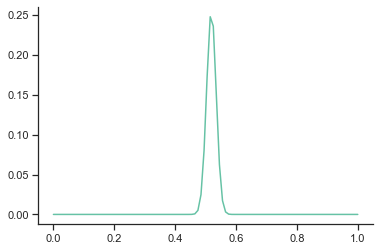

In [7]:
# We need to normalize it
# And we plot it: as expected, it spikes around 0.5: the param/p of 0.5 is the most likely
# This is going to be our prior
p_prior = p_prior/np.sum(p_prior)
plt.plot(params, p_prior)
sns.despine()

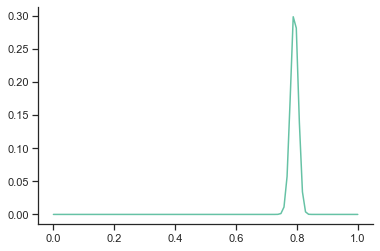

In [8]:
# Now, we create the simulation of our observation
# It's 1000 tosses of an unfair coin: 80-20
coin_flips_observed = np.random.binomial(n=1, p=0.8, size = 1000)
p_observed = np.array([np.product(st.bernoulli.pmf(coin_flips_observed, p)) for p in params])
p_observed = p_observed/np.sum(p_observed)
plt.plot(params, p_observed)
sns.despine()

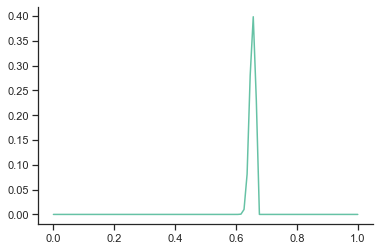

In [9]:
# Finally, we want to update our prior by obtaining the posterior:
# p(H|D) \propto p(D|H) * p(H) == Posterior \propto Likelihood *  Prior
p_posterior = [p_prior[i] * p_observed[i] for i in range(len(p_prior))]
p_posterior = p_posterior/np.sum(p_posterior)
plt.plot(params, p_posterior)
sns.despine()

## 2. Example 2: IQ Values at University

In this example something similar as before is done, but with the distributions of IQ values at the university. The distributions are considered normal; these are the followed steps:
- A prior distribution is simulated: N(100,10).
- A distribution of observations is simulated: N(115,7.5).
- We start sampling from the observations and iteratively update our prior to get a posterior normal distribution.

The more observations, the closer is our posterior to the observation distribution.

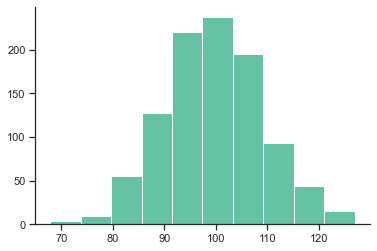

In [12]:
# Prior distribution of IQ values: N(100,10)
prior_distribution = np.random.normal(100, 10, 1000)
plt.hist(prior_distribution)
sns.despine()

Now, let's say we are collecting some observations of student IQs which takes the shape of a normal distribution with mean 115 and standard deviation of 7.5 and want to construct our posterior distribution.
In order to do this, we update our prior by calculating the mean and variance after each observation.
The equations for our updated prior mean and variance are:

$$Updated\ Prior\ Mean = \frac{\sigma^2_{observed}\mu + \sigma_{prior}^2x}{\sigma_{observed}^2 + \sigma_{prior}^2}$$

$$Updated\ Prior\ Variance = \frac{\sigma_{observed}^2\sigma_{prior}^2}{\sigma_{observed}^2 + \sigma_{prior}^2}$$

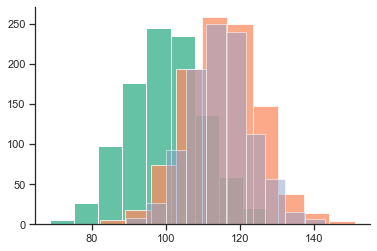

In [11]:
# Create the observations
np.random.seed(5)
observed_distribution = np.random.normal(115, 10, 1000)
# We initialize 1000 posterior parameters, to be computed later
mu = [100] * 1000 # list with 1000 values of 100
sigma = [10] * 1000

# Update prior mean and variance: first observation
mu[0] = (10**2*observed_distribution[0] + (10**2)*100)/(10**2+10**2)
sigma[0] = (10**2*10**2)/(10**2+10**2)

# Update prior mean and variance: next observations
for i in range(1000):
    if i == 999:
        break
    # The last posterior beecomes the next prior
    # and we obtain with it the next posterior
    mu[i + 1] = (sigma[i]*observed_distribution[i+1] + (10**2)*mu[i] )/(sigma[i]+10**2)
    sigma[i + 1] = (sigma[i]*10**2)/(sigma[i]+10**2)
    
# Empty matrix/2-D array to store 20 posterior distirbutions
posterior_distributions = [[]] * 20

# We simulate (sample) the distirbutions associated with the first 20 observations
for i in range(20):
    posterior_distributions[i] = np.random.normal(mu[i], sigma[i], 1000)

# We plot the prior, the observation, and the observation
# The larger the observation index, the closer is our posterior to our observation
plt.hist(prior_distribution)
plt.hist(observed_distribution, alpha = 0.75)
plt.hist(posterior_distributions[10], alpha = 0.5)
sns.despine()